# Scenerio Testing BHC Module

### Test Scenerios:

1) Simulated data clusters: Three component Gaussian mixture

2) Real data set presented in BHC paper: Glass data set

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg as la
from scipy import random as rnd
from scipy.special import gamma
import matplotlib.pyplot as plt

import bhc

### Data Sets

**Three component Gaussian mixture:**

In [2]:
# bivariate gaussian params
mu1 = np.zeros(2)
cov1 = np.eye(2)

mu2 = np.array([5, 3])
cov2 = np.eye(2)# * 2

mu3 = np.array([8, 12])
cov3 = np.eye(2)* 0.5#np.array([3.4, 0, 0, 5.1]).reshape(2, 2)

# multinom params
p1 = 0.3
p2 = 0.4
p3 = 1 - p2 - p1

# number of total draws
draws = 100

In [3]:
# random draws
rnd.seed(1)

knum = rnd.multinomial(draws, (p1, p2, p3))

gaus1 = rnd.multivariate_normal(mu1, cov1, knum[0])
gaus2 = rnd.multivariate_normal(mu2, cov2, knum[1])
gaus3 = rnd.multivariate_normal(mu3, cov3, knum[2])

# join columns into dataframe
x1 = pd.Series(np.r_[gaus1[:, 0], gaus2[:, 0], gaus3[:, 0]])
x2 = pd.Series(np.r_[gaus1[:, 1], gaus2[:, 1], gaus3[:, 1]])
c = pd.Series(np.r_[np.zeros(knum[0]), np.ones(knum[1]), np.ones(knum[2]) * 2])
dat = {"x1" : x1, "x2" : x2, "c" : c}
clustData = pd.DataFrame(dat)

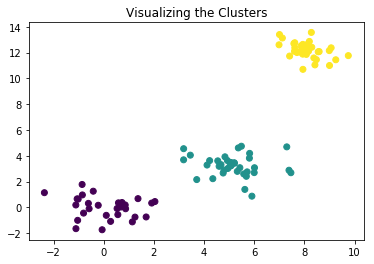

In [4]:
plt.scatter(clustData["x1"], clustData["x2"], c = clustData["c"])
plt.title("Visualizing the Clusters")
plt.show()

In [5]:
# priors distribution hyper-parameters
gcPriors = {
    "clusterConcentrationPrior" : {"alpha" : 0.1},
    "diffuseInvWishPrior" : {"df" : 2, "scale" : np.eye(2)}, # inv wishart params
    "diffuseNormPrior" : {"loc" : clustData.values[:, :2].mean(axis = 0),
                          "scale" : np.eye(2),
                          "meanscale" : 1}, # mvtnormal params
}

In [6]:
gc = clustData.values[:, :2]
gctree = bhc.HierarchyTree(X = gc, allParams = gcPriors)

In [7]:
gctree.grow_tree()

In [8]:
# pre prunning tree summary
gctree.tree_summary()

Summary for tier 65:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 100.0
	 Posterior merge probability: 2.9e-30


Summary for tier 64:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 92.0
	 Posterior merge probability: 1.5e-26


Summary for tier 63:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 84.0
	 Posterior merge probability: 4.2e-23


Summary for tier 62:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 77.0
	 Posterior merge probability: 4e-19


Summary for tier 61:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 73.0
	 Posterior merge probability: 3.6e-15


Summary for tier 60:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 69.0
	 Posterior merge probability: 4.1e-10


Summary for tier 59:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 67.0
	 Posterior merge probability: 5.5e-07


Summary for tier 58:
-------

In [9]:
gctree.prune_tree()

In [10]:
gctree.tree_summary()

Summary for tier 26:
-------------------------------
Number of clusters: 2
  Cluster 0 size: 1.0
	 Posterior merge probability: 1.0
  Cluster 1 size: 33.0
	 Posterior merge probability: 0.51


Summary for tier 25:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 33.0
	 Posterior merge probability: 0.51


Summary for tier 24:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 32.0
	 Posterior merge probability: 0.54


Summary for tier 23:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 31.0
	 Posterior merge probability: 0.61


Summary for tier 22:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 30.0
	 Posterior merge probability: 0.69


Summary for tier 21:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 29.0
	 Posterior merge probability: 0.75


Summary for tier 20:
-------------------------------
Number of clusters: 1
  Cluster 0 size: 28.0
	 Posterior merge probability

In [11]:
gctree.generate_clust_frame()
gctree.clustDF.describe

{0}
{1}
{2}
{3}
{4}
{5}
{6}
{7}
{8}
{9}
{10}
{11}
{12}
{13}
{14}
{15}
{16}
{17}
{18}
{19}
{20}
{21}
{22}
{23}
{24}
{25}
{26}
{27}
{28}
{29}
{30}
{31}
{32}
{33}
{34}
{35}
{36}
{37}
{38}
{39}
{40}
{41}
{42}
{43}
{44}
{45}
{46}
{47}
{48}
{49}
{50}
{51}
{52}
{53}
{54}
{55}
{56}
{57}
{58}
{59}
{60}
{61}
{62}
{63}
{64}
{65}
{66}
{67}
{68}
{69}
{70}
{71}
{72}
{73}
{74}
{75}
{76}
{77}
{78}
{79}
{80}
{81}
{82}
{83}
{84}
{85}
{86}
{87}
{88}
{89}
{90}
{91}
{92}
{93}
{94}
{95}
{96}
{97}
{98}
{99}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


<bound method NDFrame.describe of        Dim_0      Dim_1  clustnum
0  -0.802173  -0.448878      66.0
1  -1.105935  -1.654515      66.0
2  -2.363469   1.135345       2.0
3  -1.017014   0.637362      66.0
4  -0.859907   1.772608      65.0
5  -1.110363   0.181214      66.0
6   0.564345  -0.566510      66.0
7   0.729976   0.372994      66.0
8   0.533811  -0.091973      66.0
9   1.913820   0.330797      66.0
10  1.141943  -1.129595      66.0
11 -0.850052   0.960820      66.0
12 -0.217418   0.158515      66.0
13  0.873418  -0.111383      66.0
14 -1.038039  -1.009480      66.0
15 -1.058257   0.656284      66.0
16 -0.062492  -1.738654      66.0
17  0.103163  -0.621667      66.0
18  0.275718  -1.090675      66.0
19 -0.609985   0.306412      66.0
20  1.691826  -0.747954      66.0
21 -0.580797  -0.110754      66.0
22  2.042029   0.447521      66.0
23  0.683384   0.022886      66.0
24  0.857234   0.183931      66.0
25 -0.416112   1.250050      66.0
26  1.248300  -0.757674      66.0
27  0.588294  

In [12]:
gctree.clustDF

,Dim_0,Dim_1,clustnum
0,-0.802173,-0.448878,66.0
1,-1.105935,-1.654515,66.0
2,-2.363469,1.135345,2.0
3,-1.017014,0.637362,66.0
4,-0.859907,1.772608,65.0
5,-1.110363,0.181214,66.0
6,0.564345,-0.566510,66.0
7,0.729976,0.372994,66.0
8,0.533811,-0.091973,66.0
9,1.913820,0.330797,66.0


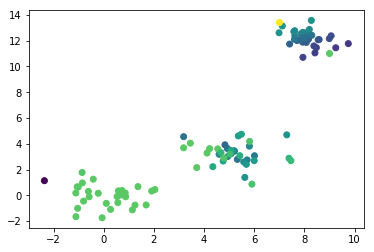

In [13]:
plt.scatter("Dim_0", "Dim_1", c = "clustnum", data=gctree.clustDF)
plt.show()

In [14]:
def purity_score(y_true, y_pred):
    """
    Inputs:
    y_true - an array of the true cluster assignments of type int
    y_pred - an array of the predicted cluster assignments of type int
    
    Output:
    Cluster purity metric (range [0,1]) for the cluster assignments 
    relative to their true values.
    """
    
    from sklearn import metrics
    
    # build confusion matrix
    conf_mat = metrics.cluster.contingency_matrix(y_true, y_pred)
    print(conf_mat)
    # calculate score
    score = np.sum(np.amax(conf_mat, axis=0))/np.sum(conf_mat)
    
    return score

In [15]:
purity_score(clustData["c"], gctree.clustDF["clustnum"])

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  27  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  1  1  1  0  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   6  0]
 [ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  1]]


0.76

**Glass Data Set:**

In [16]:
glassurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glasshead = ["ID", "RI", "Na", "Mg", "Al", "Si",
             "K", "Ca", "Ba", "Fe", "Type"]
glass = pd.read_csv(glassurl, names = glasshead, index_col = 0)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
fig, ax = plt.subplots(ncols = 3)
ax[0].scatter(glass["Al"], glass["RI"], c = glass["Type"])
ax[0].set_title("Al & RI")
ax[1].scatter(glass["Si"], glass["Na"], c = glass["Type"])
ax[1].set_title("Si & Na")
ax[2].scatter(glass["Al"], glass["Ca"], c = glass["Type"])
ax[2].set_title("Al & Ca")
plt.show()

**Data Set 3**